<a href="https://colab.research.google.com/github/Chabachib/GoogleColab-Notebooks/blob/main/Filtrage_Lineaire_Non_Lineaire.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

In [ ]:
image = cv2.imread('lenna.png', cv2.IMREAD_GRAYSCALE)

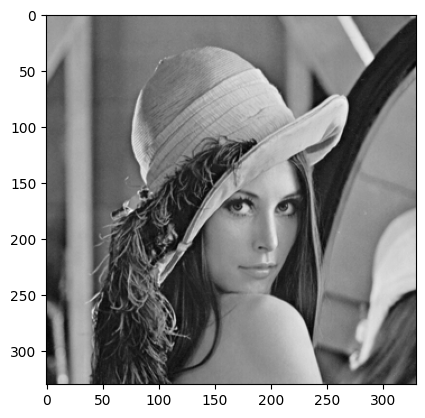

In [ ]:
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
def sp_noise(image,prob):
    '''
    Add salt and pepper noise to image
    prob: Probability of the noise
    '''
    output = np.zeros(image.shape,np.uint8)
    thres = 1 - prob
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.random()
            if rdn < prob:
                output[i][j] = 0
            elif rdn > thres:
                output[i][j] = 255
            else:
                output[i][j] = image[i][j]
    return output

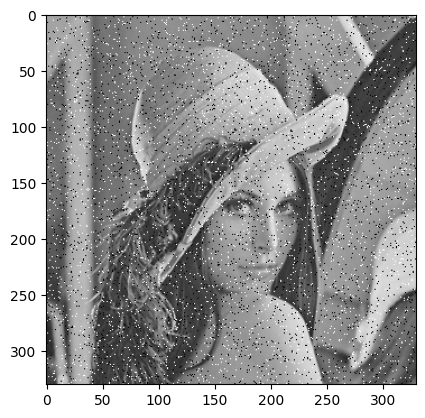

In [ ]:
ana_noise = sp_noise(image, 0.03)

plt.imshow(ana_noise, cmap='gray')
plt.show()

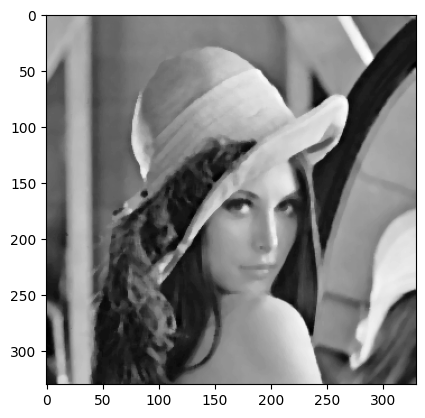

In [ ]:
filtered_image = cv2.medianBlur(ana_noise, 5)

plt.imshow(filtered_image, cmap='gray')
plt.show()

In [ ]:
blurred_image = cv2.blur(ana_noise, (3, 3))

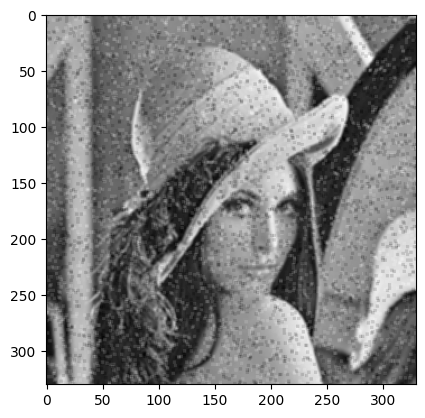

In [ ]:
plt.imshow(blurred_image, cmap='gray')
plt.show()

In [ ]:
# Function to apply midpoint filter
def midpoint_filter(image, kernel_size):
    # Get the dimensions of the image
    height, width, channels = image.shape

    # Create an empty output image
    output_image = np.zeros((height, width, channels), dtype=np.uint8)

    # Define the padding size based on kernel size
    pad_size = kernel_size // 2

    # Pad the image to handle border cases
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)

    # Apply the midpoint filter
    for y in range(height):
        for x in range(width):
            for c in range(channels):  # Iterate over each color channel
                # Extract the local neighborhood (kernel)
                local_region = padded_image[y:y+kernel_size, x:x+kernel_size, c]

                # Find the midpoint (average of the minimum and maximum)
                min_val = np.min(local_region)
                max_val = np.max(local_region)
                midpoint = (min_val + max_val) / 2

                # Set the midpoint value in the output image
                output_image[y, x, c] = midpoint

    return output_image

In [ ]:
filtered_image = midpoint_filter(ana_noise, kernel_size=3)

ValueError: not enough values to unpack (expected 3, got 2)

In [ ]:
def midpoint_filter(image, kernel_size):
    # Get the dimensions of the image
    height, width = image.shape

    # Create an empty output image
    output_image = np.zeros((height, width), dtype=np.uint8)

    # Define the padding size based on kernel size
    pad_size = kernel_size // 2

    # Pad the image to handle border cases
    padded_image = cv2.copyMakeBorder(image, pad_size, pad_size, pad_size, pad_size, cv2.BORDER_REFLECT)

    # Apply the midpoint filter
    for y in range(height):
        for x in range(width):
            # Extract the local neighborhood (kernel)
            local_region = padded_image[y:y+kernel_size, x:x+kernel_size]

            # Find the midpoint (average of the minimum and maximum)
            min_val = np.min(local_region)
            max_val = np.max(local_region)
            midpoint = (min_val + max_val) // 2  # Use integer division

            # Set the midpoint value in the output image
            output_image[y, x] = midpoint

    return output_image

In [ ]:

# Apply midpoint filter with a 3x3 kernel
filtered_image = midpoint_filter(ana_noise, kernel_size=3)

<ipython-input-88-1cca1ab7b925>:23: RuntimeWarning: overflow encountered in scalar add
  midpoint = (min_val + max_val) // 2  # Use integer division


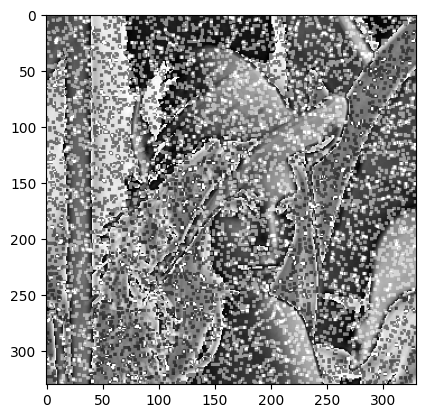

In [ ]:
plt.imshow(filtered_image, cmap='gray')
plt.show()
